### Clustering Examples

#### Example 1: K-Means

##### Read through the code below. Use online resources to learn about k-means++. Write a brief description of it here.

K-means++ description here

K-means++ works in a way to find out a proper K (number of clusters) for the k-means to solve the initialization problem and speed up convergence.
 
David Arthur and Sergei Vassilvitskii came up with K-means++ solution with the time complexity of O(log k). It follows the algorithm as the code below:

1. it chooses one initial center $c_{1}$ from data X
2. computes sqarred distance ($D_{i}$) from $c_{1}$ as ($D_{i}$) = $|| $x_{i}$ - $c_{1}$ ||^{2}$ between all points in the data X ($x_{1}$,........,$x_{i}$) 
3. chooses another new center as $c_{2}$from data X with the probability of $D_{i}$/$\sum \ {D_{i}}$
4. recomputes sqarred distance ($D_{i}$) from the minimum between $c_{1}$ and $c_{2}$  as ($D_{i}$) = min($||($x_{i}$ - $c_{1}$) , ($x_{i}$ - $c_{2}$) ||^{2}$)
5. chooses a next point until it has k centers ($c_{1}$,...,$c_{k}$)
6. proceeds with standard k-means algorithm with the centers chosen as the initial values for the cluster center




##### Read about each of the metrics used in the code below. Select two of them that you interesting and describe them here.

Metrics description here

Clustering metrics satisfiy some assumptions such that members belong to the same cluster are more similar to each other thand members in other clusters.

__adjusted_rand_score__ : 

Measures the similarity of the two assignments, ignoring permutations with a symmetric manner where any change of arguments will not affect the score. No assumption is made on the cluster structure which can be used to compare clustering algorithms.

In this metrics, ground truth class knowledge is required but usually it is not avaible at the initialization. As a result it is effective of consensus measurement.

__silhouette_score__ : 

Without the knowledge of ground truth level, this metrics evaluates using its own model. A higher coefficient will provide a better cluster definition. This coefficient provides two mean distances between the sample and one with all points in the same clusters and other with all points in the nearest cluster.

Higher coefficient ensures a dense cluster with well seperation.


n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homog	compl	v-meas	ARI	AMI	silhouette
k-means++	0.39s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.28s	69694	0.669	0.710	0.689	0.553	0.666	0.147
__________________________________________________________________________________


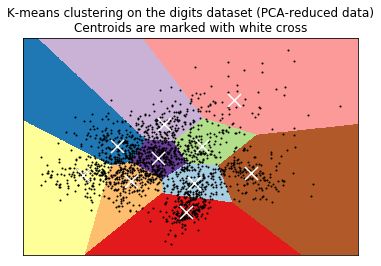

In [13]:
# K-means example

#print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### Example 2: Gaussian Mixture Model

##### Read through the code below. Then use online resources to learn about the variations of Gaussian mixture models used below. Write a brief description of the difference between the two variations.

Desription of difference here.

Variational inference is an extension of expectation-maximization that maximizes a lower bound on model evidence. Vriations add regularization by integrating information from prior distributions which avoids the singularities. It is notably slower.

Bayesian Gaussian mixture needs more hyper- parameters(the concentration parameter _weight_concentration_prior_). Here a low value makes the model put most of the weight on few components. However the remaining components weights will be tends to zero.

Dirichlet Process is a prior probability distribution on clusterings with an infinite, unbounded, number of partitions which uses a fixed maximum number of components depending on the dataset. Large values for the concentration weight prior lead to more uniform weights. 

There is implicit biases and the data it might be possible to fit better models using a finite mixture.



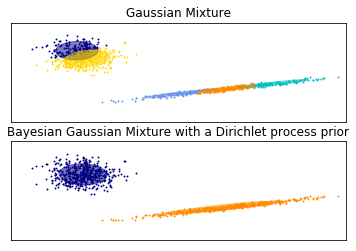

In [14]:
# Gaussian Mixture Model example

import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()

#### Example 3: DBSCAN

##### Read through the code below. Change the number of points from 750 to 150. Why does the number of clusters change? Then change the eps value to 0.5. Why did the number of clusters change now?

__Changes from 750 to 150__

DBSCAN can find arbitrarily shaped clusters and even a cluster completely surrounded by a different cluster. Due to the MinPts parameter, DBSCAN has a notion of noise. 

With small numebr of _n_samples_ DBSCAN tries to find the _core point_ to make a cluster with its neighbour or otherwise put it as an outlier label. Next it will find all density-reachable points and add them to the cluster.

__Changes in eps to 0.5__

The maximum distance between two samples for them to be considered as in the same neighborhood. We have increased the number of points in our neighborhood by increasing the radius from 0.3 to 0.5.



Estimated number of clusters: 3
Homogeneity: 0.945
Completeness: 0.841
V-measure: 0.890
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.838
Silhouette Coefficient: 0.556


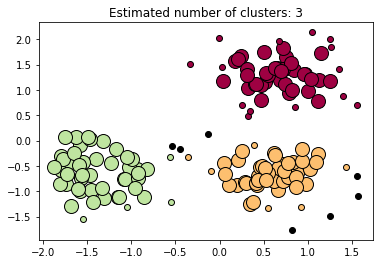

In [15]:
# DBSCAN example

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=150, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()